# INM701: Exploratory Data Analysis and Data Processing

We need to investigate our dataset before building and running relevant machine learning models. In this notebook, we find out more about the protein sequences and make several plots to visualise the data.

Note: Some of the analysis below is inspired by EDA done by the author of the dataset, and can be found on their [code page](https://www.kaggle.com/datasets/kirkdco/protein-secondary-structure-2022).

AA: Amino Acid

### Import Libraries and Dataset

In [1]:
# Import Relevant Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

# Logomaker is a custom library for biological data, installed using 'pip'
import logomaker

In [2]:
# Create a variable for the path to the directory containing the dataset (and where to work)
path = "https://www.kaggle.com/datasets/kirkdco/protein-secondary-structure-2022"

# Create a variable containing the full path of the dataset
dataset = os.path.join(path, "2022-08-03-ss.cleaned.csv")

# Create a Pandas DataFrame of the dataset (which is a .csv file)
df = pd.read_csv(dataset, delimiter = ",")

# Check for duplicate rows or NA values
print(df.isnull().sum() == 0, "\n")
print("How Many Duplicate Rows?", df.duplicated().sum())

# Many of the proteins can have the same amino acid sequence as another (we call these homologous proteins)
# This can get quite confusing (and will likely lead to less intelligent machine learning models)
print("How Many Duplicate Protein Sequences?", df["seq"].duplicated().sum())

df

pdb_id           True
chain_code       True
seq              True
sst8             True
sst3             True
len              True
has_nonstd_aa    True
dtype: bool 

How Many Duplicate Rows? 0
How Many Duplicate Protein Sequences? 364453


,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa
0,1A30,C,EDL,CBC,CEC,3,False
1,1B05,B,KCK,CBC,CEC,3,False
2,1B0H,B,KAK,CBC,CEC,3,False
3,1B1H,B,KFK,CBC,CEC,3,False
4,1B2H,B,KAK,CBC,CEC,3,False
...,...,...,...,...,...,...,...
477148,4UWE,D,MGDGGEGEDEVQFLRTDDEVVLQCSATVLKEQLKLCLAAEGFGNRL...,CCCCCCCCCCCCCCBTTCEEEEEEEEEETTEEEEEEEECCCSSCCB...,CCCCCCCCCCCCCCECCCEEEEEEEEEECCEEEEEEEECCCCCCCE...,5037,True
477149,5J8V,A,MGDGGEGEDEVQFLRTDDEVVLQCSATVLKEQLKLCLAAEGFGNRL...,CCCCCCCCCCCCCCCSSSCCEEEECSEETTEECCEECCEEETTEEE...,CCCCCCCCCCCCCCCCCCCCEEEECCEECCEECCEECCEEECCEEE...,5037,False
477150,5J8V,B,MGDGGEGEDEVQFLRTDDEVVLQCSATVLKEQLKLCLAAEGFGNRL...,CCCCCCCCCCCCCCCSSSCCEEEECSEETTEECCEECCEEETTEEE...,CCCCCCCCCCCCCCCCCCCCEEEECCEECCEECCEECCEEECCEEE...,5037,False
477151,5J8V,C,MGDGGEGEDEVQFLRTDDEVVLQCSATVLKEQLKLCLAAEGFGNRL...,CCCCCCCCCCCCCCCSSSCCEEEECSEETTEECCEECCEEETTEEE...,CCCCCCCCCCCCCCCCCCCCEEEECCEECCEECCEECCEEECCEEE...,5037,False


In [3]:
# We are only interested in protein sequences that contain no non-standard amino acids, so we filter these out
df = df[df["has_nonstd_aa"] == False]

# 'has_nonstd_aa' is no longer useful (all False values), so we can remove this column
df = df.drop(columns = ["has_nonstd_aa"])

# We saw earlier that there are duplicate sequences, so let us get rid of these to be safe (we are interested in diverse sequences)
df = df.drop_duplicates(subset = ["seq"])

df

,pdb_id,chain_code,seq,sst8,sst3,len
0,1A30,C,EDL,CBC,CEC,3
1,1B05,B,KCK,CBC,CEC,3
2,1B0H,B,KAK,CBC,CEC,3
3,1B1H,B,KFK,CBC,CEC,3
5,1B32,B,KMK,CBC,CEC,3
...,...,...,...,...,...,...
477124,5W1R,A,MAGSGAGVRCSLLRLQETLSAADRCGAALAGHQLIRGLGQECVLSS...,CCCCCCCCCCSHHHHHHHHTTTTTTCCTTTTHHHHHHHHHHHHCCC...,CCCCCCCCCCCHHHHHHHHCCCCCCCCCCCCHHHHHHHHHHHHCCC...,4128
477125,6RLA,A,GDKDCEMKRTTLDSPLGKLELSGCEQGLHRIIFLGKGTSAADAVEV...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,4513
477133,5NUG,A,MSEPGGGGGEDGSAGLEVSAVQNVADVSVLQKHLRKLVPLLLEDGG...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,4646
477135,6OR5,A,MDVLIEWVAIYPQIYDILEHINYVPSNTLQRLRLHQPWSKIDYDVW...,CCGGGGGTTTSCTHHHHHHHHSCCCCHHHHHHTTCCSSCCCCSCTH...,CCHHHHHCCCCCCHHHHHHHHCCCCCHHHHHHCCCCCCCCCCCCCH...,4717


### Filtered Dataset

There are still over 100000 protein sequences, so using the full dataset would be far too computationally expensive. We take a subset of the dataset by looking only at those sequences that have length within [16, 150].

In [4]:
# Rather than working with over 100000 protein sequences, we can filter the dataset to make it smaller
# We will select AA sequences that have length within [16, 150], note we are using the same minimum as AlphaFold

df_filtered = df[(df["len"] >= 16) & (df["len"] <= 150)]

# Save as a .csv file, to be used for our machine learning models
df_filtered.to_csv("prot-seq-filtered.csv", index = False)

df_filtered

,pdb_id,chain_code,seq,sst8,sst3,len
10281,1BXL,B,GQVGRQLAIIGDDINR,CCTTHHHHHHHHHTCC,CCCCHHHHHHHHHCCC,16
10286,1D9K,P,GNSHRGAIEWEGIESG,CCEECCCCCCCCCCCC,CCEECCCCCCCCCCCC,16
10289,1DPU,B,RIQRNKAAALLRLAAR,CCSSHHHHHHHHHHCC,CCCCHHHHHHHHHHCC,16
10290,1DXP,C,KGSVVIVGRIILSGRK,CCCBEEEEEEEECCCC,CCCEEEEEEEEECCCC,16
10296,1EJH,E,KQYDREFLLDFQFMPA,CCCCHHHHHTTSCCCC,CCCCHHHHHCCCCCCC,16
...,...,...,...,...,...,...
142461,6U64,A,EDELYRQSLEIISRYLREQATGAKDTKPMGRSGATSRKALETLRRV...,CCHHHHHHHHHHHHHHHHHHSSSCCCCCCCCCCHHHHHHHHHHHHH...,CCHHHHHHHHHHHHHHHHHHCCCCCCCCCCCCCHHHHHHHHHHHHH...,150
142468,6WKK,G,PYVRLGYEGILNGAHDIDVAGLNGVEQLAGKFATIGANGVKLAGDN...,CCSSCBCSCCSSSCCCCCSSCSSSSSCCCCCBBCTTCSSCCCCTTT...,CCCCCECCCCCCCCCCCCCCCCCCCCCCCCCEECCCCCCCCCCCCC...,150
142486,6XX1,C,HMKIELKYKNGRTNVNTDTIYPMFTIVNKGNQKVKLSNIKIRYYYT...,CCCEEEEEEESCCCSSCSEECEEEEEEECSSSCEEGGGEEEEEEEC...,CCCEEEEEEECCCCCCCCEECEEEEEEECCCCCEEHHHEEEEEEEC...,150
142490,6YPB,A,MGNETVVVAETAGSIKVAVVVCLLRGQNVLLGRRRSSLGDSTFSLP...,CCCCCCCCCCCCCEEEEEEEEEEEETTEEEEEEECCCCCTTCEECC...,CCCCCCCCCCCCCEEEEEEEEEEEECCEEEEEEECCCCCCCCEECC...,150


### Sequence Length Distribution

Full Standard AA Dataset: The distribution below shows that there are far fewer sequences that exceed length 1000, than there are of length below 1000. The mean is approximately 264, and we can see that most sequence lengths are relatively close to the mean. The kernel density estimate (KDE) is provided using the default bandwidth method, Scott's Rule. The Gaussian kernel is also used.

Minimum Protein Sequence Length: 3
Maximum Protein Sequence Length: 5037
Mean Protein Sequence Length: 263.7238172444574


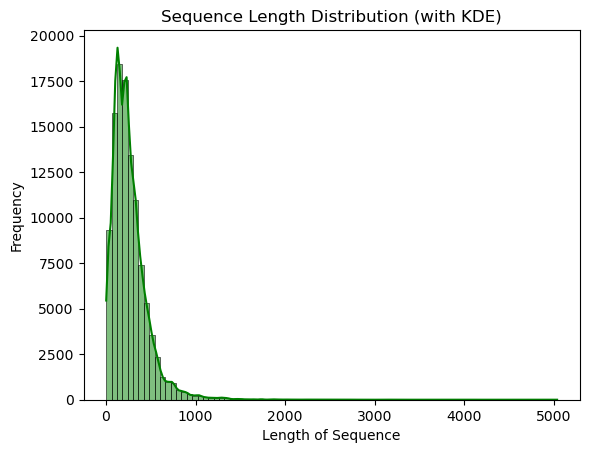

In [5]:
# Create a variable for the sequence lengths
len_df = df["len"]

# Output some summary statistics
print(f"Minimum Protein Sequence Length: {min(len_df)}")
print(f"Maximum Protein Sequence Length: {max(len_df)}")
print(f"Mean Protein Sequence Length: {np.mean(len_df)}")

# Choose appropriate number of bins
bins = range(len_df.min(), len_df.max() + 1, 60)

# Use Seaborn to produce a histogram, while including the KDE
sns.histplot(len_df, bins = bins, kde = True, color = "green")
# Set title, x-axis label and y-axis label
plt.title("Sequence Length Distribution (with KDE)")
plt.xlabel("Length of Sequence")
plt.ylabel("Frequency")
plt.show()

Filtered AA Dataset: The distribution below shows that a large proportion of the sequences have length close to 100. The mean is approximately 96. We find that there are a lot more longer sequences (say > 80) than smaller sequences. Again, Scott's Rule and the Gaussian kernel are used for the KDE.

Minimum Protein Sequence Length: 16
Maximum Protein Sequence Length: 150
Mean Protein Sequence Length: 96.2326656394453


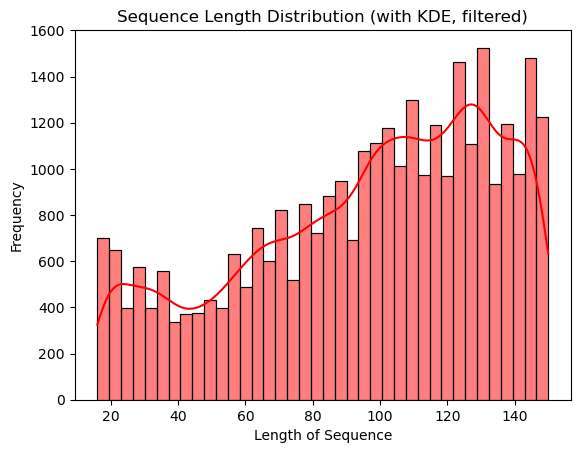

In [6]:
# Create a variable for the sequence lengths
len_df_filtered = df_filtered["len"]

# Output some summary statistics
print(f"Minimum Protein Sequence Length: {min(len_df_filtered)}")
print(f"Maximum Protein Sequence Length: {max(len_df_filtered)}")
print(f"Mean Protein Sequence Length: {np.mean(len_df_filtered)}")

# Use Seaborn to produce a histogram, while including the KDE
# Default bins look fine, so no need to define our own
sns.histplot(len_df_filtered, kde = True, color = "red")
# Set title, x-axis label and y-axis label
plt.title("Sequence Length Distribution (with KDE, filtered)")
plt.xlabel("Length of Sequence")
plt.ylabel("Frequency")
plt.show()

### Secondary Structure Distribution

The distribution of the secondary structure of the protein sequences are very similar for both our unfiltered and filtered datasets. Loops/Irregularities are the most common (C), followed by helices (H) and then sheets (E) [in SST-3].

In [7]:
# Function to visualise distribution of SST-3/SST-8
def sst_visualise(df, ss_types, ss_colors, title):
    ss_counts = defaultdict(lambda: 0)

    for seq in df:
        for ss in set(seq):
            ss_counts[ss] += seq.count(ss)

    plt.bar(range(len(ss_types)), height = [ss_counts[ss] for ss in ss_types], tick_label = ss_types, edgecolor = "black", width = 0.75, zorder = 3, color = ss_colors)
    plt.title(title)
    plt.xlabel("Element")
    plt.ylabel("Frequency")
    plt.show()

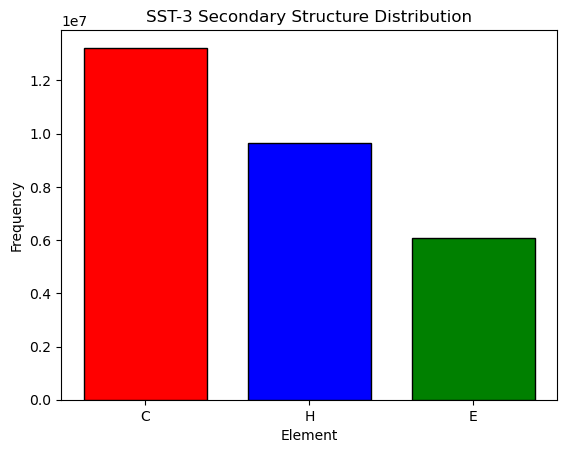

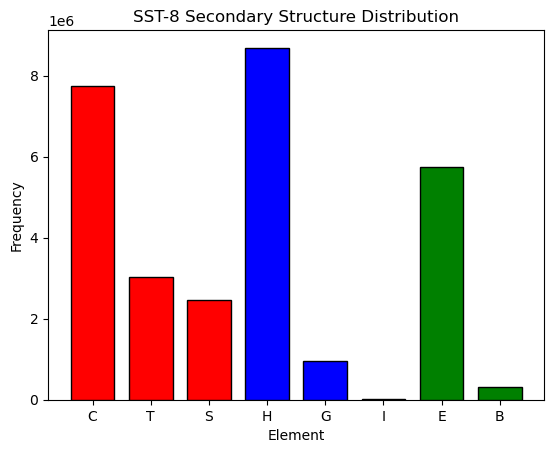

In [8]:
# Define elements for SST-3 and SST-8, and custom colours
ss3_types = ["C", "H", "E"]
ss8_types = ["C", "T", "S", "H", "G", "I", "E", "B"]
sst3_colors = ["red", "blue", "green"]
sst8_colors = ["red", "red", "red", "blue", "blue", "blue", "green", "green"]

# Plot for SST-3
sst_visualise(df["sst3"], ss3_types, sst3_colors, "SST-3 Secondary Structure Distribution")

# Plot for SST-8
sst_visualise(df["sst8"], ss8_types, sst8_colors, "SST-8 Secondary Structure Distribution")

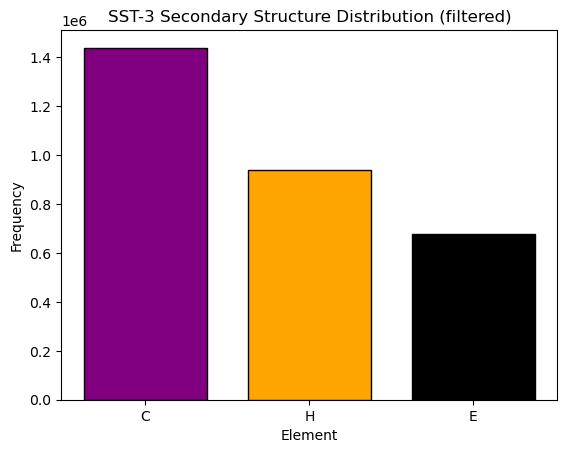

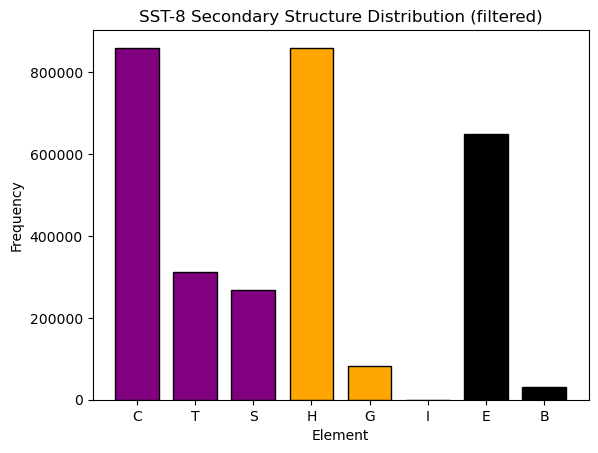

In [9]:
# Define elements for SST-3 and SST-8, and custom colours
ss3_types = ["C", "H", "E"]
ss8_types = ["C", "T", "S", "H", "G", "I", "E", "B"]
sst3_colors = ["purple", "orange", "black"]
sst8_colors = ["purple", "purple", "purple", "orange", "orange", "orange", "black", "black"]

# Plot for SST-3
sst_visualise(df_filtered["sst3"], ss3_types, sst3_colors, "SST-3 Secondary Structure Distribution (filtered)")

# Plot for SST-8
sst_visualise(df_filtered["sst8"], ss8_types, sst8_colors, "SST-8 Secondary Structure Distribution (filtered)")

### Amino Acid Distribution

The distribution of the amino acids are not too different between the unfiltered and filtered datasets. Aspartate (D) is the most frequent in the unfiltered dataset, and Phenylalanine (F) is the most frequent in the filtered dataset (though one of the least frequent in the unfiltered dataset). These differences should not be a cause for concern, considering that we are only working with a subset of the protein data bank.

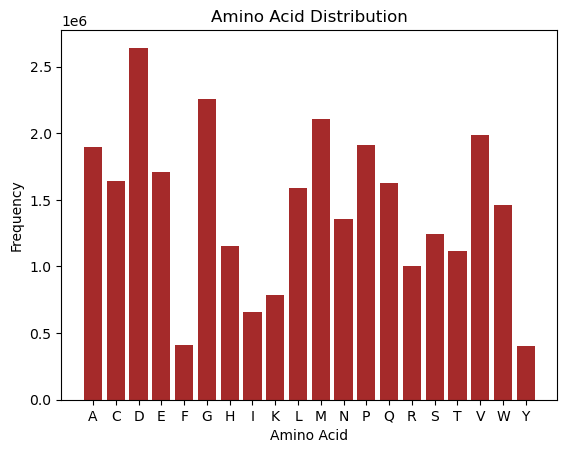

In [10]:
# Concatenate all sequences into a single string
all_sequences = "".join(df["seq"])

# Count the occurrence of each amino acid
amino_acid_counts = Counter(all_sequences)

# Plot the amino acid distribution
plt.bar(sorted(amino_acid_counts.keys()), amino_acid_counts.values(), color = "brown")
plt.title('Amino Acid Distribution')
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.show()

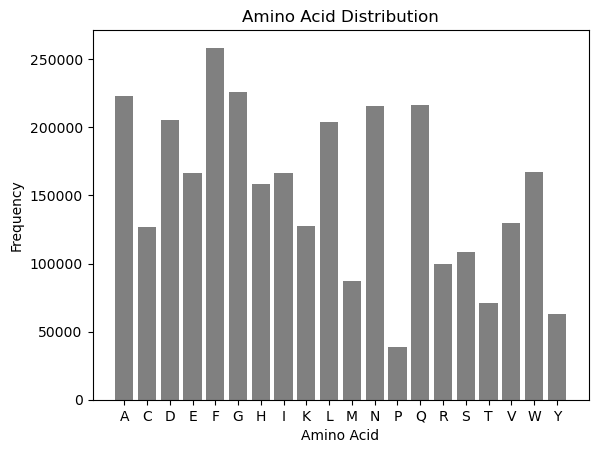

In [11]:
# Concatenate all sequences into a single string
all_sequences = "".join(df_filtered["seq"])

# Count the occurrence of each amino acid
amino_acid_counts = Counter(all_sequences)

# Plot the amino acid distribution
plt.bar(sorted(amino_acid_counts.keys()), amino_acid_counts.values(), color = "gray")
plt.title('Amino Acid Distribution')
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.show()

### Sequence Logo

A [sequence logo](https://en.wikipedia.org/wiki/Sequence_logo) displays the sequence conservation of amino acids. It is a useful tool to determine how amino acids are distributed in protein sequences of the same length. Starting from the bottom, the logo shows the most "popular" amino acid at each position of the sequences (here we have 26 positions).

In [12]:
# Create a sequence logo for AA sequences that have length equal to 26 (necessary to have equal lengths)
# 26 is a random choice, generating a sequence logo for every sequence length would have too many images
seq_logo = df_filtered[df_filtered["len"] == 26]["seq"]

seq_logo

16128    AVVKVPLKKFKSIRETMKEKGLLGEF
16130    FVNQHLCGSHLVEALYLVCGERGFFA
16131    VKLIPSWTTVILVKSMLRKRSFGNPF
16132    MPGTIKENIIFGVSYDEYRYRSVIKA
16134    MAQDIISTIGDLVKWIIDTVNKFTKK
                    ...            
16537    SAQQELKQRQRAEIYALNRVMTELEQ
16539    ARTKQTARKSTGGKAPRCQLATCAAW
16543    GRRKRKWLRRIGKGVKIIGGAALDHL
16548    EEQWAREIGAQLRRMADDLNAQYERR
16551    KRKKARMPNSPAPHFAMPPIHEDHLE
Name: seq, Length: 127, dtype: object

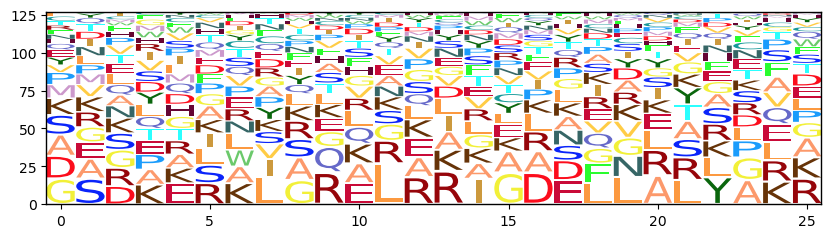

In [13]:
# Convert the sequences to a list
sequences = seq_logo.values

# Creates a matrix of the sequence alignment
crp_counts_df = logomaker.alignment_to_matrix(sequences = sequences, to_type = "counts")

# Generate and display the sequence logo
logomaker.Logo(crp_counts_df, show_spines = True, color_scheme = "skylign_protein", vpad = 0.1, stack_order = "small_on_top", fade_probabilities = False)